# 인공지능 22/06/07
## 2019130044 손영채

## UniversalBank 데이터
- 문제: 고객의 다양한 데이터를 기반을 개인 대출 수락 여부 예측
- 불필요하다고 판단되는 변수 제거
- 카테고리 데이터 경우 dummy 변수(one-hot vector로 변환)
- y값 시각화
- decision tree, knn, bagging, random forest, adaboost, gradient boost 선택
- Train test 0.25 비율로 나눈 후 학습 및 테스트
- 검증 -f1,recall,acc 지표 활용

In [719]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, f1_score
import seaborn as sns


In [720]:
df = pd.read_csv ('UniversalBank.csv')

#### 불필요한 변수 제거

In [721]:
X=df.drop(['ID','ZIP Code','Personal Loan'],axis=1)

#### Education dummy 처리 완료

In [722]:
df=pd.get_dummies(df,columns=['Education'])

In [723]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'Education_1', 'Education_2', 'Education_3'],
      dtype='object')

In [724]:
feature_names=X.columns.tolist()

In [725]:
Y=df['Personal Loan']

#### Y 변수 시각화

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

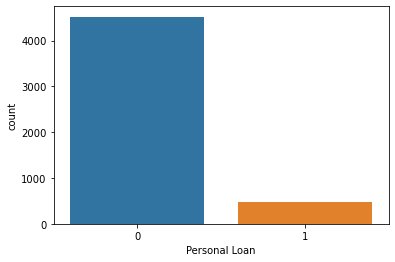

In [726]:
sns.countplot(x=Y)

# Decission Tree

In [727]:
tr_x,ts_x, tr_y, ts_y = train_test_split(X,Y, test_size = 0.25)

In [728]:
dt=DT(random_state=10)

In [729]:
dt.fit(tr_x,tr_y)

DecisionTreeClassifier(random_state=10)

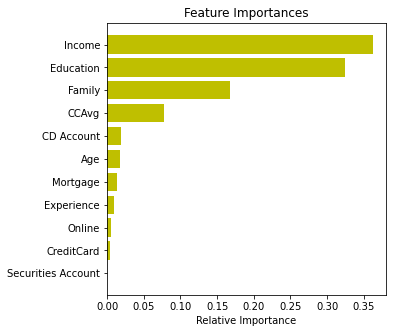

In [730]:
features = feature_names
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(5,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [731]:
y_train_pred = dt.predict(tr_x)

In [732]:
y_test_pred=dt.predict(ts_x)

In [733]:
acc = accuracy_score(y_true=ts_y, y_pred=y_test_pred)
recall = recall_score(y_true=ts_y, y_pred=y_test_pred)
f1 = f1_score(y_true=ts_y, y_pred=y_test_pred)

print('DT classification')
print('acc={:.3f},recall={:.3f},f1_score={:.3f}'.format(ts_acc,ts_recall,ts_f1))

DT classification
acc=0.983,recall=0.912,f1_score=0.908


In [734]:
depth_set=[3,5,7,9]
dt_f1_set=[]
for depth in depth_set:
    dt=DT(max_depth=depth)
    dt.fit(tr_x,tr_y)
    y_test_pred=dt.predict(ts_x)
    dt_f1_set.append(f1_score(y_true=ts_y,y_pred=y_test_pred))

In [735]:
best_depth=depth_set[np.argmax(dt_f1_set)]

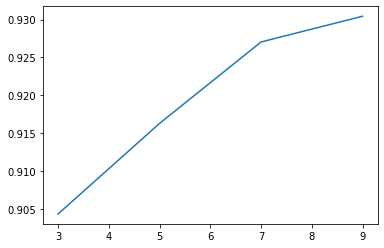

In [736]:
plt.plot(depth_set,dt_f1_set)

In [737]:
best_dt=DT(max_depth=best_depth)

In [738]:
best_dt.fit(tr_x,tr_y)

DecisionTreeClassifier(max_depth=9)

In [739]:
best_dt_pred_y=best_dt.predict(ts_x)

In [740]:
acc = accuracy_score(y_true=ts_y, y_pred=best_dt_pred_y)
recall = recall_score(y_true=ts_y, y_pred=best_dt_pred_y)
f1 = f1_score(y_true=ts_y, y_pred=best_dt_pred_y)

print('DT classification')
print('acc={:.3f},recall={:.3f},f1_score={:.3f}'.format(ts_acc,ts_recall,ts_f1))

DT classification
acc=0.983,recall=0.912,f1_score=0.908


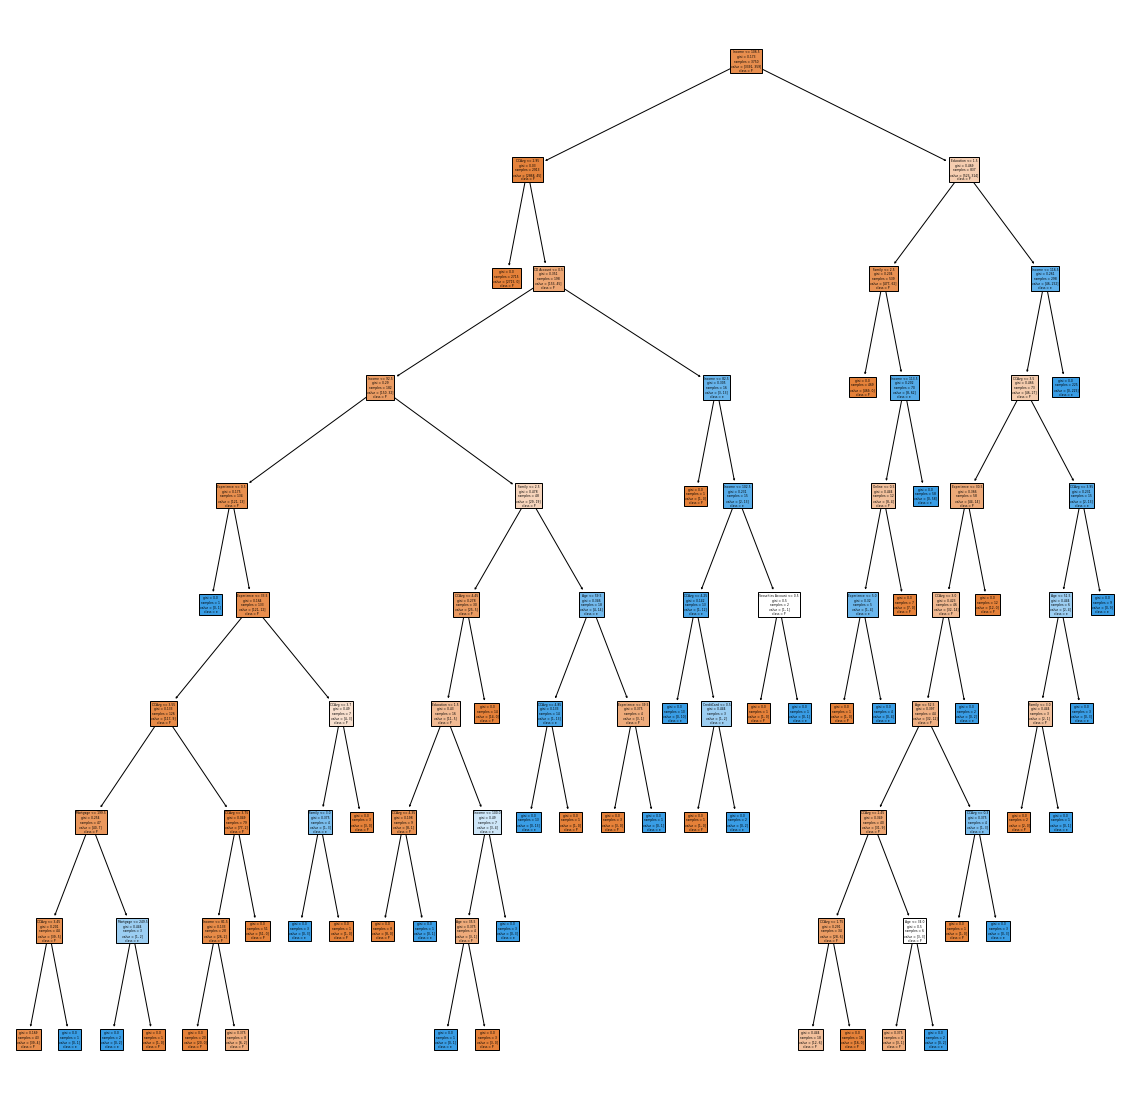

In [741]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(dt, 
                   feature_names=feature_names,  
                   class_names='Personal Loan',
                   filled=True)
fig.savefig('tree.png')

In [742]:
text_representation = tree.export_text(dt,feature_names =  list(feature_names))
print(text_representation)

|--- Income <= 106.50
|   |--- CCAvg <= 2.95
|   |   |--- class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Experience <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Experience >  0.50
|   |   |   |   |   |--- Experience <= 33.50
|   |   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |   |--- Mortgage <= 199.50
|   |   |   |   |   |   |   |   |--- CCAvg <= 3.45
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- CCAvg >  3.45
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Mortgage >  199.50
|   |   |   |   |   |   |   |   |--- Mortgage <= 249.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Mortgage >  249.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- CCAvg >  3.55
|   |   |   |   |   |   |   |--- CCAvg <= 3.75
|   |   |   |   |   |   |   |   |--

# Gradient Boosting Classifier

In [743]:
from sklearn.ensemble import GradientBoostingClassifier 

In [744]:
GBC=GradientBoostingClassifier()

In [745]:
GBC.fit(tr_x,tr_y)

GradientBoostingClassifier()

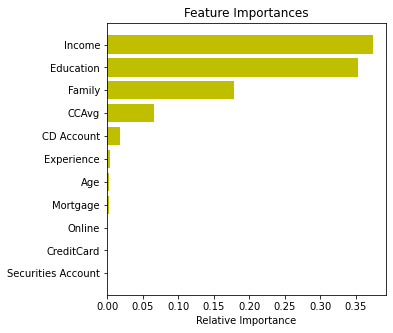

In [746]:
features = feature_names
importances = GBC.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(5,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [747]:
Gpred_y=GBC.predict(ts_x)

In [748]:
acc = accuracy_score(y_true=ts_y, y_pred=Gpred_y)
recall = recall_score(y_true=ts_y, y_pred=Gpred_y)
f1 = f1_score(y_true=ts_y, y_pred=Gpred_y)

print('acc={:.3f}, recall={:.3f}, f1_score={:.3f}'.format(acc,recall,f1))

acc=0.987, recall=0.884, f1_score=0.930


# Random Forest

In [749]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(tr_x, tr_y)

RandomForestClassifier()

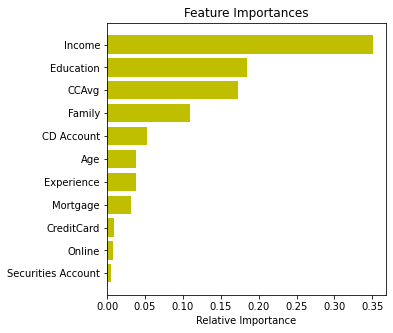

In [750]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(5,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [751]:
Rpred_y=rf.predict(ts_x)

In [752]:
acc = accuracy_score(y_true=ts_y, y_pred=Rpred_y)
recall = recall_score(y_true=ts_y, y_pred=Rpred_y)
f1 = f1_score(y_true=ts_y, y_pred=Rpred_y)

print('acc={:.3f}, recall={:.3f}, f1_score={:.3f}'.format(acc,recall,f1))

acc=0.987, recall=0.868, f1_score=0.929


# 결론

In [753]:
acc = accuracy_score(y_true=ts_y, y_pred=best_dt_pred_y)
recall = recall_score(y_true=ts_y, y_pred=best_dt_pred_y)
f1 = f1_score(y_true=ts_y, y_pred=best_dt_pred_y)

print('DT classification')
print('acc={:.3f},recall={:.3f},f1_score={:.3f}'.format(ts_acc,ts_recall,ts_f1))

DT classification
acc=0.983,recall=0.912,f1_score=0.908


In [754]:
acc = accuracy_score(y_true=ts_y, y_pred=Gpred_y)
recall = recall_score(y_true=ts_y, y_pred=Gpred_y)
f1 = f1_score(y_true=ts_y, y_pred=Gpred_y)

print('Gradient Boosting Classifier')
print('acc={:.3f}, recall={:.3f}, f1_score={:.3f}'.format(acc,recall,f1))

Gradient Boosting Classifier
acc=0.987, recall=0.884, f1_score=0.930


In [755]:
acc = accuracy_score(y_true=ts_y, y_pred=Rpred_y)
recall = recall_score(y_true=ts_y, y_pred=Rpred_y)
f1 = f1_score(y_true=ts_y, y_pred=Rpred_y)

print('Random Forest')
print('acc={:.3f}, recall={:.3f}, f1_score={:.3f}'.format(acc,recall,f1))

Random Forest
acc=0.987, recall=0.868, f1_score=0.929
